# CpE 4040 Final Test Part 2 

In this problem you are given a data set which consists of certain parameters of a particular group of female patients showing whether they have or don't have diabetes mellitus disease. 
You will create a model that will predict whether they have this disease or not. You will use the dataset provided with this notebook that has the file name of "dataset.csv".

This dataset contains the following features:

* 'Pregnancies': Number of past pregnancies of the female patients
* 'Glucose': Glucose measurement
* 'BloodPressure': Blood pressure measurement
* 'SkinThickness': Skin Thickness measurement
* 'Insulin': Insulin Measurment
* 'BMI': Body Mass Index Measurement
* 'DiabetesPedigreeFunction': A function which scores likelihood of diabetes based on family history
* 'Age': Age of the patient
* 'Outcome': 0 or 1 indicating disease (0: non-diabetic, 1: diabetic)

<span style="color:red">Go through each step, generate the required scripts to complete the requirements. Also, answer the questions (if there is any) related with the generated output.</span>

### Start

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Data
**Read in the dataset.csv file and set it to a data frame called diab_data.**

In [4]:
diab_data = pd.read_csv('dataset.csv')

**Generate the first 10 lines of the data (head).**

In [6]:
diab_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Generate the related method to get detail information of the dataset and identify the number of patients in the dataset.**

In [7]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<span style="color:red">Enter the number of patients:</span>** 768

**Generate the related method to get statistical information about the dataset. Indentify the average age and maximum Glucose value of the patients.**

In [8]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<span style="color:red">Average Age of the patients:</span>** 33

**<span style="color:red">Max Glucose value of the patients:</span>** 199

**Generate a pairplot for only Outcome, Glucose, BMI, DiabetesPedigreeFunction and Age features.**

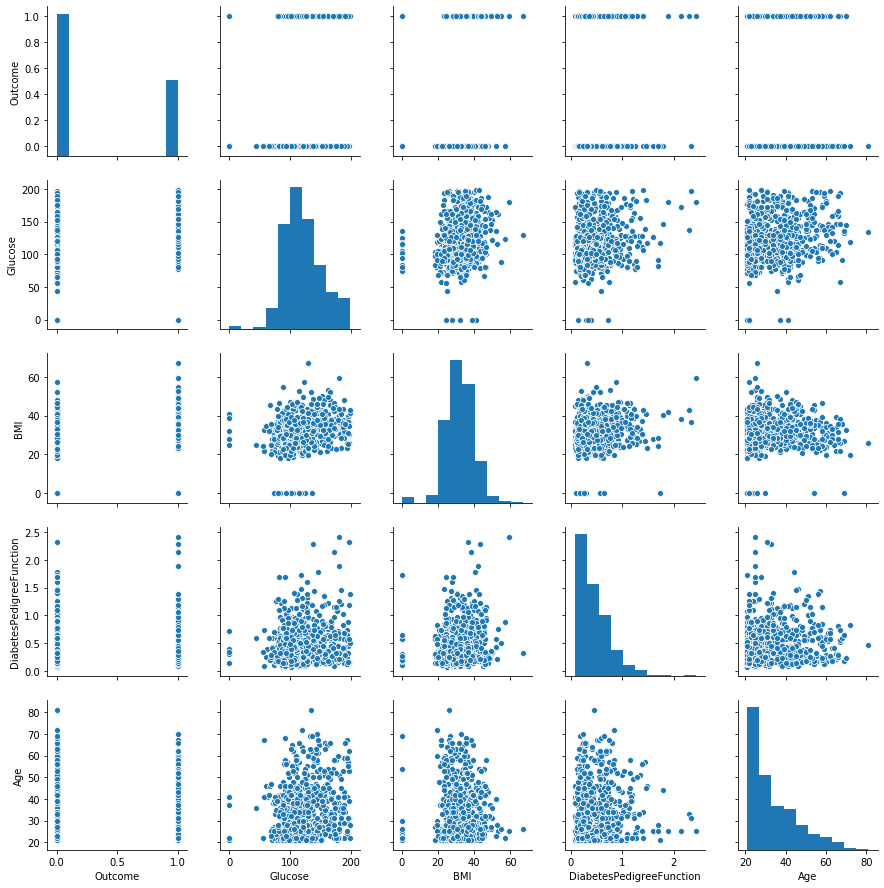

In [13]:
sns.pairplot(diab_data, vars=["Outcome", "Glucose", "BMI", "DiabetesPedigreeFunction","Age" ])

### Exploratory Data Analysis

**Create a histogram of the Age for 10 bins and identify approximately the max number of age group (bin).**

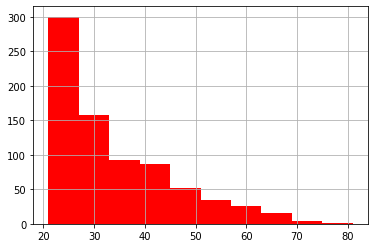

In [15]:
diab_data['Age'].hist(color='red',bins=10)

**<span style="color:red">Max Number of age group reading:</span>** 80

**Plot countplot to estimate how many non-diabetic patient.**

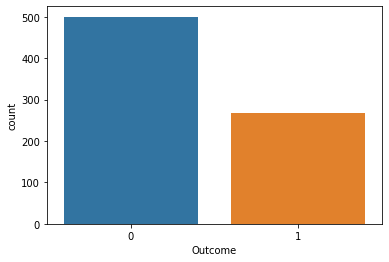

In [16]:
sns.countplot(x='Outcome',data=diab_data)

 **<span style="color:red">Number of non-diabetic patients (approximately):</span>** 500

**Generate correlation table to find out which features are most and least correlated with outcome.**

In [18]:
diab_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**<span style="color:red">Most correlated feature with Outcome:</span>** Glucose

**<span style="color:red">Least correlated feature with Outcome:</span>** Blood Pressure

**Generate a heatmap plot that shows the correlation matrix with numbers on it.**

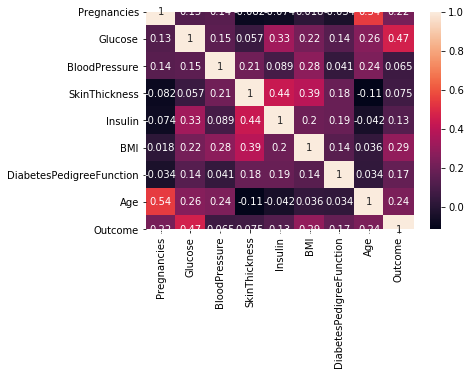

In [19]:
sns.heatmap(diab_data.corr(),annot=True)

### Start Creating the Model



**Create your input and output data. Split the data into training set and testing set using proper package and method. Use a test size of 30% and your own arbitrary number for random_state.**

In [20]:
from sklearn.model_selection import train_test_split

X = diab_data.drop('Outcome',axis=1)
y = diab_data['Outcome']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

**Train and fit your model on the training set.**

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression(max_iter=300)
logmodel.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions and Evaluations
**Now predict values for the testing data.**

In [24]:
predictions = logmodel.predict(X_test)

**Create a classification report for the model.**

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.56      0.64        81

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



**Generate the confusion matrix for your model.**

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,predictions)

array([[136,  14],
       [ 36,  45]])

**Based on your outputs calculate your accuracy!**
<br> Accuracy = (TP + TN) / (TP + TN + FP + FN)
<br> Accuracy = (136 + 45) / (136 + 45 + 14 + 36)

**<span style="color:red">Accuracy of your model:</span>** 78%

## Done!!!

**<span style="color:blue">Save your notebook as Jupyter Notebook (ipynb) file while renaming the file name as "CpE 4040 Final Test Part 2 Your Full Name". Then, submit only the notebook to D2L assignment Final Test dropbox!!</span>**